# FI 8090

Assignment 4 Group 1

Akintola Adesomoju, Elisa Lage Modesto Alcofra, Prashant Kumar

In [1]:
import pandas as pd
import csv


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf


import matplotlib as mpl 
from sklearn.tree import export_graphviz 
import graphviz


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import mean_squared_error

In [2]:
#loading data from file College.csv

import pandas as pd
college=pd.read_csv("College.csv")

In [3]:
college.rename(columns={'F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'SF_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'},inplace=True)

In [4]:
#Checking the number of rows and columns
college.shape  # 19 predictors and 777 colunms

(777, 19)

In [5]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
#Check the data types 
print (college.dtypes)

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F_Undergrad      int64
P_Undergrad      int64
Outstate         int64
Room_Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
SF_Ratio       float64
perc_alumni      int64
Expend           int64
Grad_Rate        int64
dtype: object


In [7]:
# removed the name of colleges 
dc = college.dropna().drop('Unnamed: 0', axis = 1)  
dc.info()

# creating dummy variable for private
dc['Private_yes_dummy']=dc['Private'].apply(lambda x: 1 if x=='Yes' else 0)
dc['Private_no_dummy']=dc['Private'].apply(lambda x: 1 if x=='No' else 0)

dc.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  SF_Ratio     777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

(777, 20)

In [8]:
dc

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,perc_alumni,Expend,Grad_Rate,Private_yes_dummy,Private_no_dummy
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,0
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,1
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,0
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,0
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,0


In [9]:
y = dc.Apps  # y is the number of applications, what we want to predict

# Drop the column with the number of the applications (Apps) and columns for which we created dummy variables (Private)
X = dc.drop(['Apps', 'Private'], axis = 1).astype('float64')

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accept             777 non-null    float64
 1   Enroll             777 non-null    float64
 2   Top10perc          777 non-null    float64
 3   Top25perc          777 non-null    float64
 4   F_Undergrad        777 non-null    float64
 5   P_Undergrad        777 non-null    float64
 6   Outstate           777 non-null    float64
 7   Room_Board         777 non-null    float64
 8   Books              777 non-null    float64
 9   Personal           777 non-null    float64
 10  PhD                777 non-null    float64
 11  Terminal           777 non-null    float64
 12  SF_Ratio           777 non-null    float64
 13  perc_alumni        777 non-null    float64
 14  Expend             777 non-null    float64
 15  Grad_Rate          777 non-null    float64
 16  Private_yes_dummy  777 non

In [10]:
X.head()

,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_Ratio,perc_alumni,Expend,Grad_Rate,Private_yes_dummy,Private_no_dummy
0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0,1.0,0.0
1,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0,1.0,0.0
2,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0,1.0,0.0
3,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0,1.0,0.0
4,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0,1.0,0.0


PART 1-LASSO

In [11]:
# Part 1- LASSO
# 1a. Split the data set randomly into training and test data set.

x_train, x_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
##See the size of the training sample
x_train.shape

(388, 18)

In [13]:
##See the size of the test sample
x_test.shape

(389, 18)

In [14]:
# Creating alpha values 
alphas = 10**np.linspace(10,-2,100)*0.5  
alphas  

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [15]:
#1b. Fit Lasso model using on the training data set

#Associating each Alpha value to a Lasso coefficient

lasso = Lasso(normalize = True)
coefs = []  

for a in alphas:
    lasso.set_params(alpha = a)   
    lasso.fit(x_train,y_train)  
    coefs.append(lasso.coef_)  
    
np.shape(coefs)    

(100, 18)

In [16]:
#1c. Perform cross-validation on the training data set to choose the best lambda

lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)
print(lassocv.alpha_) # the best lambda (alpha)

1.004616501282523


In [17]:
#1d. Estimate the predicted values using the best lambda obtained in part (c) on the test data and compute test MSE

lasso4 = Lasso(alpha = lassocv.alpha_, normalize = True) # using the best lambda (alpha)
lasso4.fit(x_train, y_train)
predictions = lasso4.predict(x_test)
print(pd.Series(lasso4.coef_, index = X.columns))
print('MSE: ', mean_squared_error(y_test, predictions))

Accept               1.291762e+00
Enroll              -0.000000e+00
Top10perc            2.463158e+01
Top25perc            0.000000e+00
F_Undergrad         -0.000000e+00
P_Undergrad         -7.083682e-03
Outstate            -3.990994e-02
Room_Board           1.710514e-01
Books                1.009911e-01
Personal            -0.000000e+00
PhD                 -5.095694e+00
Terminal            -0.000000e+00
SF_Ratio             1.456514e+01
perc_alumni         -3.106915e+00
Expend               4.458435e-02
Grad_Rate            6.434275e+00
Private_yes_dummy   -5.278541e+02
Private_no_dummy     1.152546e-12
dtype: float64
MSE:  1765764.5969269595


In [18]:
#1e. Compare the Lasso predicted test MSE (with the best lambda) with the null model (lambda=infinity) test MSE and least square regression model (lambda=0) test MSE. What do you conclude?

#LASSO with null model (lambda=infinity)
lasso_null = Lasso(alpha = 10**10, normalize = True)
lasso_null.fit(x_train, y_train)            
pred3 = lasso_null.predict(x_test)           
print(pd.Series(lasso_null.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))          

Accept               0.0
Enroll               0.0
Top10perc            0.0
Top25perc            0.0
F_Undergrad          0.0
P_Undergrad          0.0
Outstate             0.0
Room_Board           0.0
Books                0.0
Personal             0.0
PhD                  0.0
Terminal             0.0
SF_Ratio             0.0
perc_alumni         -0.0
Expend               0.0
Grad_Rate            0.0
Private_yes_dummy   -0.0
Private_no_dummy     0.0
dtype: float64
18760780.49525573


In [19]:
#LASSO with lambda=0
lasso_lr = Lasso(alpha = 0, normalize = True)  
lasso_lr.fit(x_train, y_train)             
pred = lasso_lr.predict(x_test)            
print(pd.Series(lasso_lr.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))  

Accept               1.421398e+00
Enroll              -3.508598e-01
Top10perc            3.082543e+01
Top25perc           -2.764894e+00
F_Undergrad         -5.869366e-03
P_Undergrad         -1.251353e-02
Outstate            -6.628850e-02
Room_Board           2.012493e-01
Books                1.347389e-01
Personal             8.485628e-03
PhD                 -9.432663e+00
Terminal             1.248121e+00
SF_Ratio             2.423477e+01
perc_alumni         -3.529694e+00
Expend               5.807989e-02
Grad_Rate            8.469310e+00
Private_yes_dummy   -6.495046e+02
Private_no_dummy     1.436819e-10
dtype: float64
1654196.5091456783


<ipython-input-19-432890297114>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_lr.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132887505.83385605, tolerance: 434395.11400618555
  model = cd_fast.enet_coordinate_descent(


In [20]:
#Lambda=1.004616501282523 (best lambda), MSE=1765764.5969269595

#Lambda=infinity, MSE=18760780.49525573

#Lambda=0, MSE=1654196.5091456783


# We verify that with lambda zero we obtained the lower MSE in comparion with MSE for best lambda and for lambda infinity.

# When using Lambda infinity the coefficients come out to 0, also we had a higher MSE value. The Lambda infinity gave a number in the 10's of millions.

# Calculating Lasso using best lambda gives us a lower MSE than lambda infinity.



In [21]:
#1f. Now construct the Lasso model for the entire data set and obtain the Lasso coefficients using the best lambda obtained in part (c) and report the number of non-zero coefficient estimates.

lasso4.fit(X, y)

coef =pd.Series(lasso4.coef_, index=X.columns)

print(coef)

Accept                 1.418691
Enroll                -0.081829
Top10perc             29.879697
Top25perc             -0.000000
F_Undergrad           -0.000000
P_Undergrad            0.008963
Outstate              -0.048947
Room_Board             0.115919
Books                  0.000000
Personal               0.000000
PhD                   -4.662578
Terminal              -3.273943
SF_Ratio               0.934343
perc_alumni           -1.064755
Expend                 0.066601
Grad_Rate              4.258235
Private_yes_dummy   -392.785299
Private_no_dummy       0.000000
dtype: float64


In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables that have non-zero coefficients")

Lasso picked 13 variables that have non-zero coefficients


In [23]:
#1g. Now use the Lasso predictors obtained in part (f) to fit the Linear Regression Model and report the summary of the linear model

# The following columns have coefficient estimates as zero
x1 = X.drop(columns = ['Top25perc','F_Undergrad','Books', 'Personal','Private_no_dummy'])

In [146]:
import statsmodels.api as sm

model = sm.OLS(y,x1)
results = model.fit()


In [147]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Apps   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1244.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        00:15:11   Log-Likelihood:                         -6500.1
No. Observations:                 777   AIC:                                  1.303e+04
Df Residuals:                     764   BIC:                                  1.309e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Accept                1.5852      0.040     39.394      0.000       1.506       1.664
Enroll               -0.6251      0.114     -5.466      0.000      -0.850      -0.401
Top10perc            37.2804      3.299     11.299      0.000      30.804      43.757
P_Undergrad           0.0561      0.031      1.812      0.070      -0.005       0.117
Outstate             -0.0854      0.019     -4.511      0.000      -0.123      -0.048
Room_Board            0.1392      0.047      2.937      0.003       0.046       0.232
PhD                  -8.9363      4.617     -1.936      0.053     -18.000       0.127
Terminal             -7.6388      4.759     -1.605      0.109     -16.981       1.704
SF_Ratio              2.1451      9.792      0.219      0.827     -17.077      21.367
perc_alumni          -1.2700      4.088     -0.311      0.756      -9.295       6.755
Expend                0.0811      0.012      6.868      0.000       0.058       0.104
Grad_Rate             6.4112      2.852      2.248      0.025       0.812      12.011
Private_yes_dummy  -607.4657    128.425     -4.730      0.000    -859.573    -355.358
==============================================================================
Omnibus:                      498.976   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10127.924
Skew:                           2.542   Prob(JB):                         0.00
Kurtosis:                      19.941   Cond. No.                     5.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

PART 2-Regression Tree

In [148]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [149]:
college = pd.read_csv('college.csv')

In [150]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [151]:
college.rename(columns={'F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'SF_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'},inplace=True)

In [152]:
#2a. Fit a Regression Tree (max depth =3) to the training data, with Apps as the response and the all other variables as predictors. Create a plot of the tree. Note how many terminal nodes the tree has.
regr_tree = DecisionTreeRegressor(max_depth = 3) 
regr_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

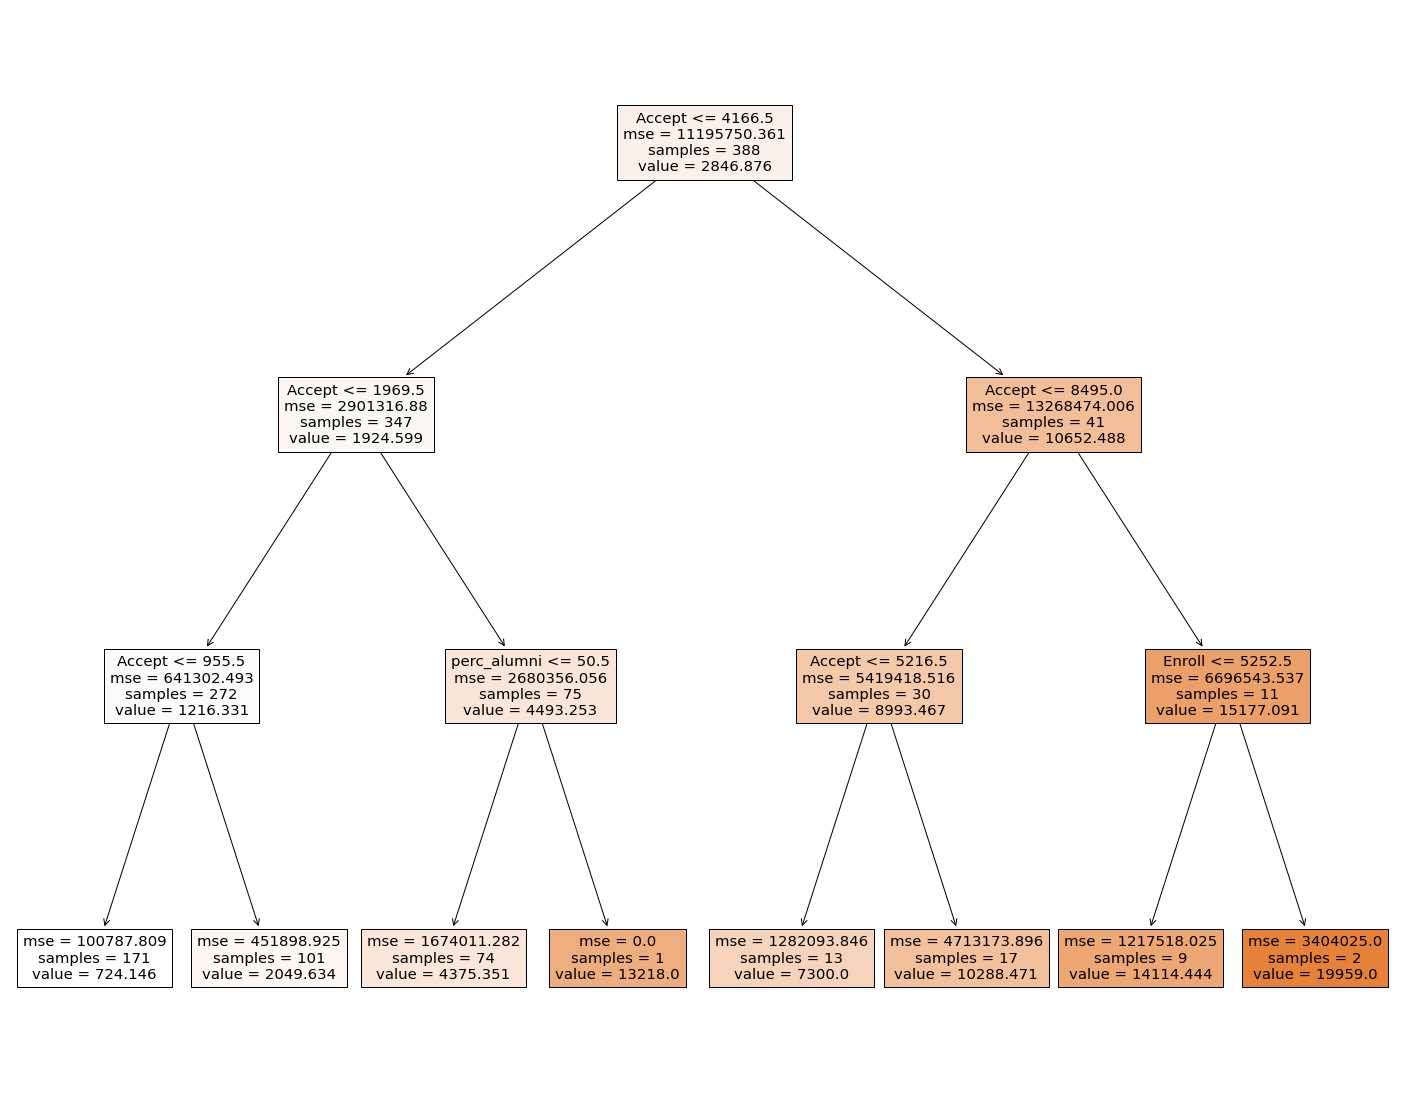

In [153]:
from sklearn.tree import plot_tree
#Creating a regresssion tree 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regr_tree, 
                   feature_names=x_train.columns,  
                   filled=True)

In [154]:
# There are 8 terminal nodes in the tree.

In [155]:
#2b. Print: Training accuracy and Test Accuracy, and  Test MSE

y_pred = regr_tree.predict(x_test)

print('Training accuracy: ',regr_tree.score(x_train,y_train))
print('Test Accuracy: ',regr_tree.score(x_test,y_test))
print('MSE: ',mean_squared_error(y_test, y_pred))

Training accuracy:  0.9306368279941877
Test Accuracy:  0.6962193196791524
MSE:  5670133.666474589


In [156]:
#2c. Now to find the optimal depth that will improve performance use cost complexity pruning to prune the decision tree

path=DecisionTreeRegressor(random_state=1).cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [157]:
path

{'ccp_alphas': array([0.00000000e+00, 1.28865979e-03, 1.28865979e-03, 1.28865979e-03,
        1.28865979e-03, 1.71821306e-03, 1.71821306e-03, 5.15463918e-03,
        5.15463918e-03, 5.15463918e-03, 5.15463918e-03, 1.07388316e-02,
        1.15979381e-02, 1.15979381e-02, 1.15979381e-02, 1.15979381e-02,
        1.15979381e-02, 2.06185567e-02, 2.06185567e-02, 2.06185567e-02,
        2.06185567e-02, 3.22164948e-02, 3.22164948e-02, 3.22164948e-02,
        3.22164948e-02, 3.22164948e-02, 3.22164948e-02, 3.22164948e-02,
        3.22164948e-02, 4.63917526e-02, 4.63917526e-02, 4.63917526e-02,
        4.63917526e-02, 4.63917526e-02, 5.19759450e-02, 5.49828179e-02,
        6.18556701e-02, 6.31443299e-02, 6.31443299e-02, 7.25945017e-02,
        8.24742268e-02, 8.24742268e-02, 8.24742268e-02, 8.24742268e-02,
        1.13616838e-01, 1.24140893e-01, 1.28865979e-01, 1.28865979e-01,
        1.28865979e-01, 1.28865979e-01, 1.28865979e-01, 1.55927835e-01,
        1.55927835e-01, 1.55927835e-01, 1.68384880

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

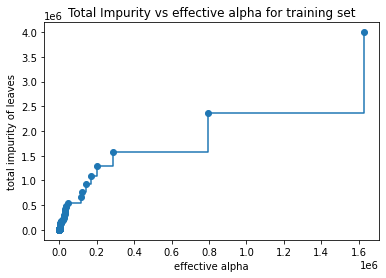

In [158]:
#2d. Based on part (c), produce a plot to observe total impurity versus effective alpha for training set. What do you observe?

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
#ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [159]:
#As the Effective Alpha increases we see an increase in the total impurity as well. 

In [160]:
#2e. Construct plots to display number of nodes versus alpha and tree depth versus alpha. What do you observe?

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 7198934.918809457


In [161]:
clfs[0].tree_.node_count

765

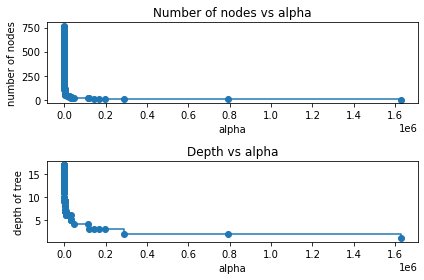

In [162]:
clfs = clfs[:-1] #removing last element
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [163]:
#We noticed that as the number of nodes and tree depth decreases there is an increase in alpha. 

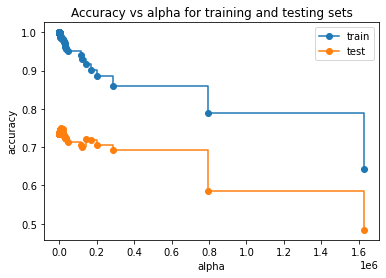

In [164]:
#2f. Construct plot to observe changes of training and test accuracy with respect to alpha.  What do you observe?

train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [165]:
# We can see from the graph that training and test follow a similar pattern. As the alpha increases, training and test both decrease in accuracy

In [166]:
#2g. Find which alpha corresponds to the highest test score? Find the depth of the tree corresponding to the best alpha and create the tree using that depth. Print the decision tree.  Compute the mean 
ccp_alphas

array([0.00000000e+00, 1.28865979e-03, 1.28865979e-03, 1.28865979e-03,
       1.28865979e-03, 1.71821306e-03, 1.71821306e-03, 5.15463918e-03,
       5.15463918e-03, 5.15463918e-03, 5.15463918e-03, 1.07388316e-02,
       1.15979381e-02, 1.15979381e-02, 1.15979381e-02, 1.15979381e-02,
       1.15979381e-02, 2.06185567e-02, 2.06185567e-02, 2.06185567e-02,
       2.06185567e-02, 3.22164948e-02, 3.22164948e-02, 3.22164948e-02,
       3.22164948e-02, 3.22164948e-02, 3.22164948e-02, 3.22164948e-02,
       3.22164948e-02, 4.63917526e-02, 4.63917526e-02, 4.63917526e-02,
       4.63917526e-02, 4.63917526e-02, 5.19759450e-02, 5.49828179e-02,
       6.18556701e-02, 6.31443299e-02, 6.31443299e-02, 7.25945017e-02,
       8.24742268e-02, 8.24742268e-02, 8.24742268e-02, 8.24742268e-02,
       1.13616838e-01, 1.24140893e-01, 1.28865979e-01, 1.28865979e-01,
       1.28865979e-01, 1.28865979e-01, 1.28865979e-01, 1.55927835e-01,
       1.55927835e-01, 1.55927835e-01, 1.68384880e-01, 1.71821306e-01,
      

In [167]:
import operator
index, value = max(enumerate(test_scores), key=operator.itemgetter(1))
print(index)
print(value)
print(len(test_scores))

352
0.7491544481018095
374


In [168]:
# Best alpha is 0.7491544481018095 

In [169]:
# alpha for the highest test score
ccp_alphas[352]

9787.111918531642

In [170]:
test_scores[352]

0.7491544481018095

In [171]:
clfs[352].tree_.node_count

45

In [172]:
# Depth of the tree for best alpha
clfs[352].tree_.max_depth

6

In [173]:
# Depth of tree for best alpha is 6.

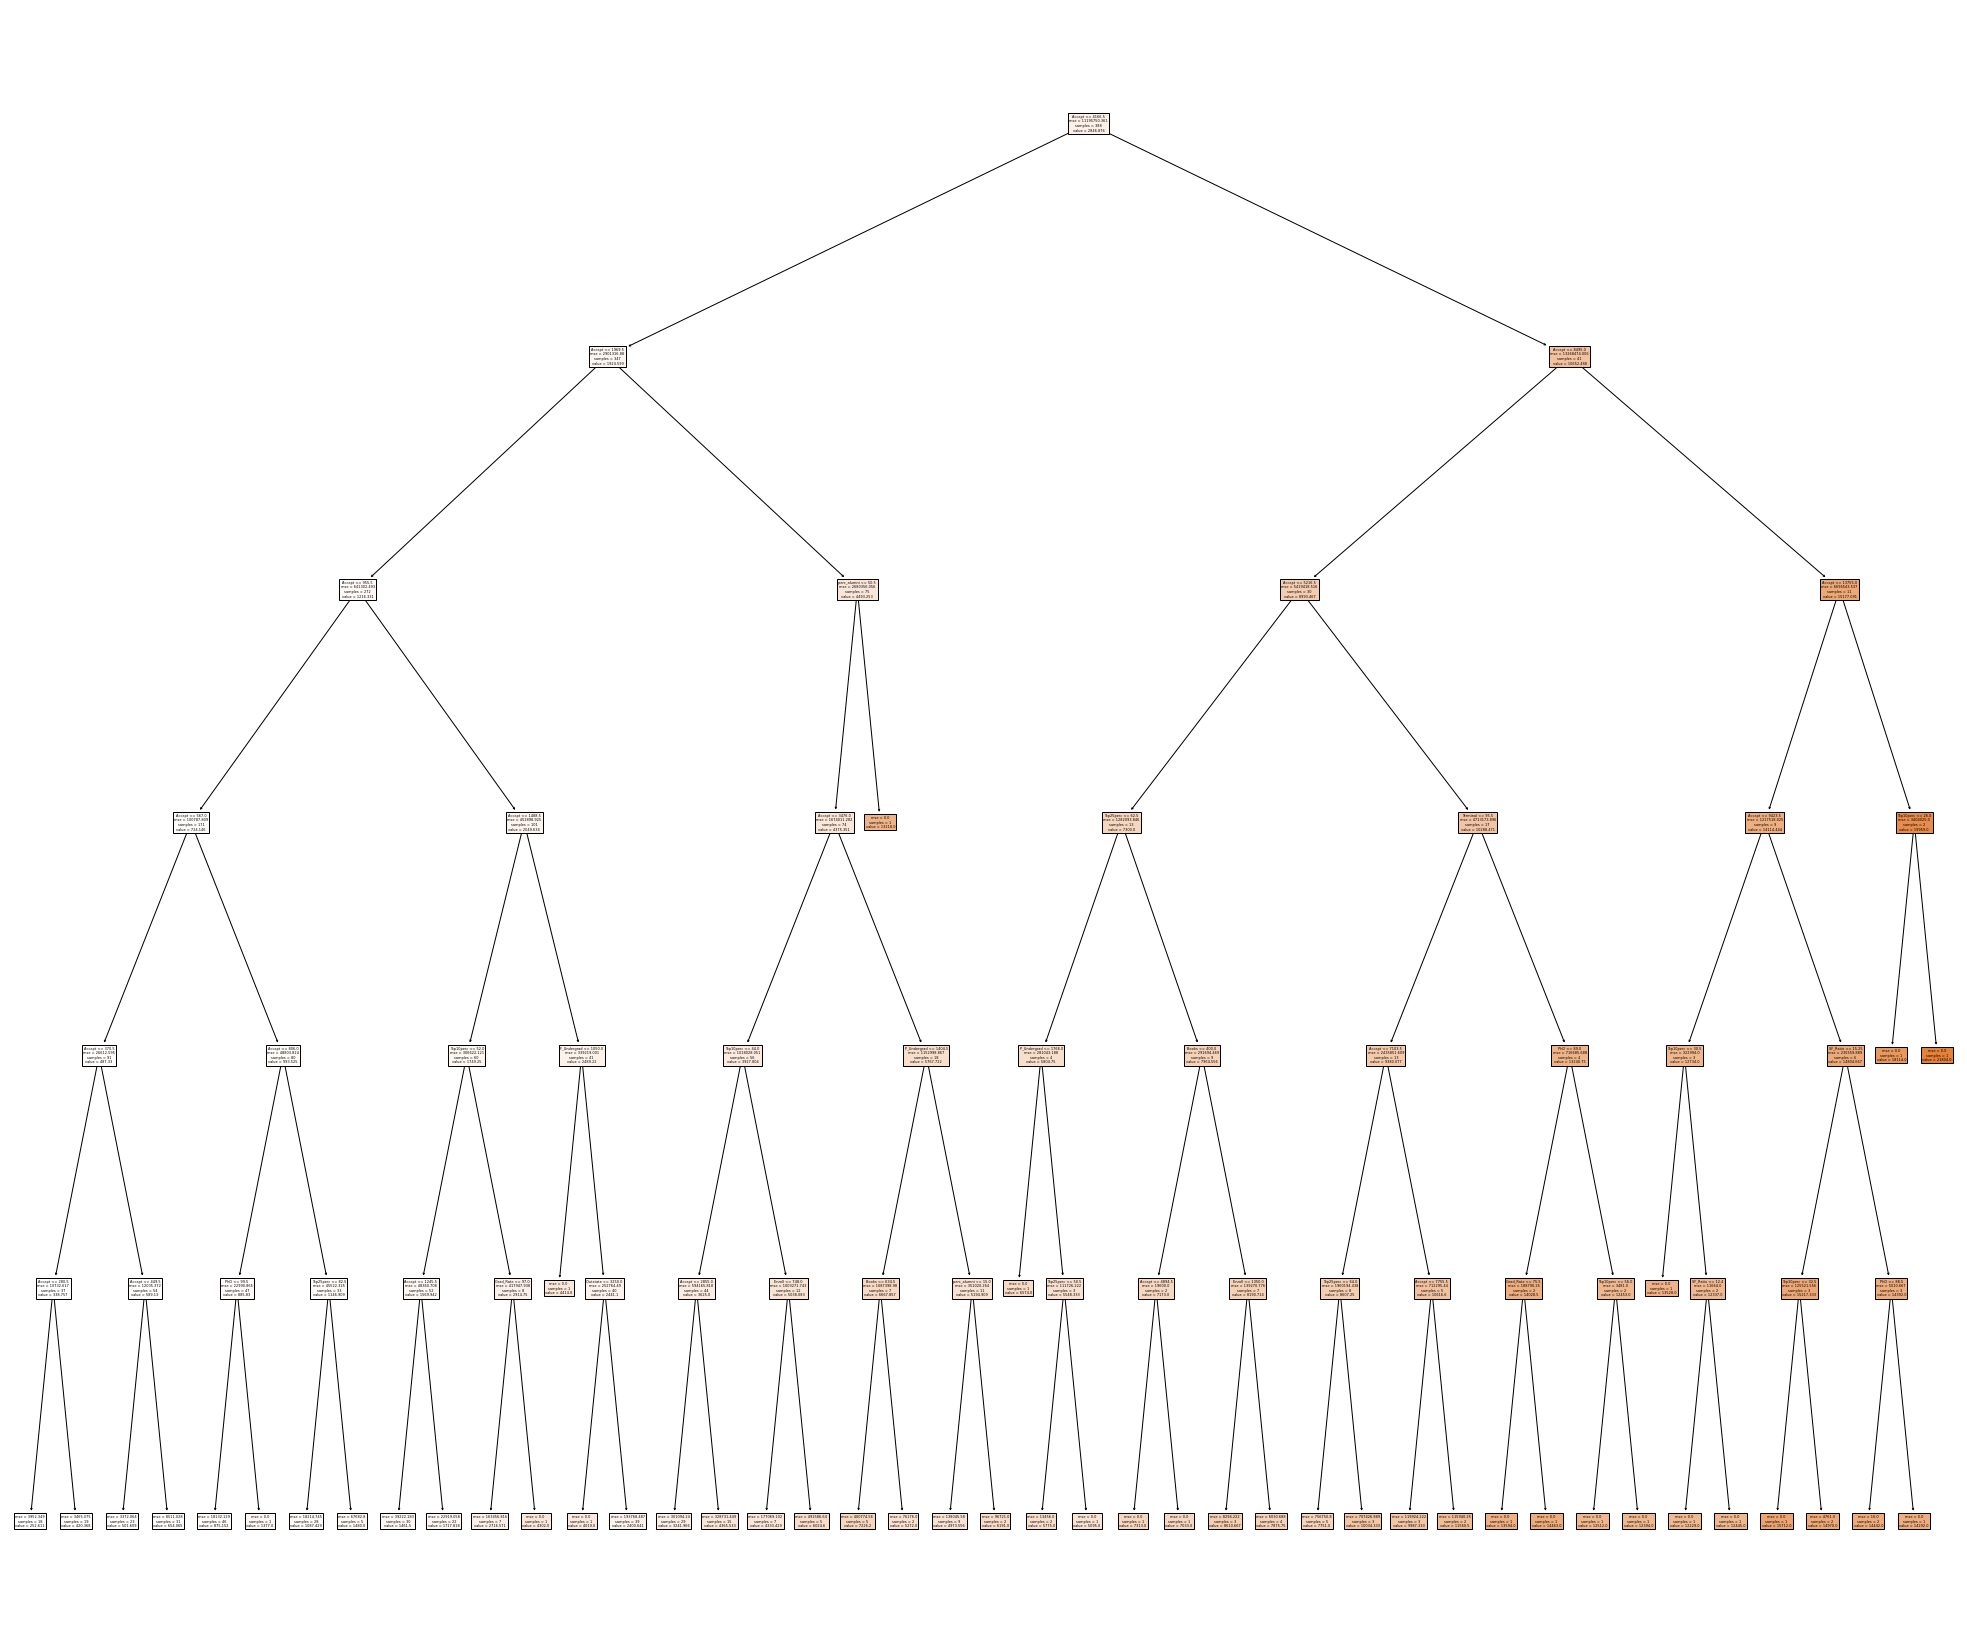

In [174]:
#Printing the decision tree using depth of the tree for the best alpha:6.  

regr_tree_best_alpha = DecisionTreeRegressor(max_depth=6, random_state=42)
regr_tree_best_alpha.fit(x_train, y_train)

fig = plt.figure(figsize=(35,30))
_ = plot_tree(regr_tree_best_alpha, 
                   feature_names=x_train.columns,  
                   filled=True)

In [175]:
print('Mean Squared Error: ', mean_squared_error(y_test, regr_tree_best_alpha.predict(x_test)))

Mean Squared Error:  3414012.0888769585


In [176]:
#Mean Squared Error: 3414012.0888769585 

# Calculating the regression tree with max depth as 3, we obtained mean squared error of 5588159.643052709 while calculating the regression tree using optimal depth of 6, the mean squared error was 3414012.0888769585. 
# We verify that the mean squared error of the regression tree considering depth 6 (optimal depth) has a lower mse than using depth3. 


In [177]:
#2h. Compare the above test error rates in part (g) with the one obtained using LASSO regression (test MSE) in Part 1(d).

# MSE for LASSO regression model is 1765764.5969269595 while MSE for regression tree considering the optimal depth 6 is 3414012.0888769585. 

# Since MSE for LASSO regression model is lower than MSE for regression tree, we observe that LASSO is a better model for this case.


In [178]:
#2i. Which model will you select for this decision problem and why?

# We will choice the LASSO model instead of regression tree for this decision problem because it has the lower MSE. 
